In [72]:
from standardInclude import *

In [73]:
#f = r.TFile("./data/gm2nearline_hists_run24307_00461.root")
f = r.TFile("./data/gm2nearline_ana.root")
f.cd("nearlineHistTree")
f.ls()

TFile**		./data/gm2nearline_ana.root	
 TFile*		./data/gm2nearline_ana.root	
  TDirectoryFile*		nearlineHistTree	nearlineHistTree (CaloNearlineHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	calo13;1	calo13
   KEY: TDirectoryFile	calo14;1	calo14
   KEY: TDirectoryFile	calo15;1	calo15
   KEY: TDirectoryFile	calo16;1	calo16
   KEY: TDirectoryFile	calo17;1	calo17
   KEY: TDirectoryFile	calo18;1	calo18
   KEY: TDirectoryFile	calo19;1	calo19
   KEY: TDirectoryFile	calo20;1	calo20
   KEY: TDirectoryFile	calo21;1	calo21
   KEY: TDirectoryFile	calo22;1	calo22

In [74]:
t = f.Get("nearlineHistTree").Get("eventTree")
t.Print()

******************************************************************************
*Tree    :eventTree : eventTree                                              *
*Entries :      128 : Total =        11726794 bytes  File  Size =    8836734 *
*        :          : Tree compression factor =   1.33                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :      128 : Total  Size=       1079 bytes  File Size  =        105 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   5.62     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :      128 : Total  Size=       1094 bytes  File Size  =        108 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   5.49     *
*...................................................

128 fills


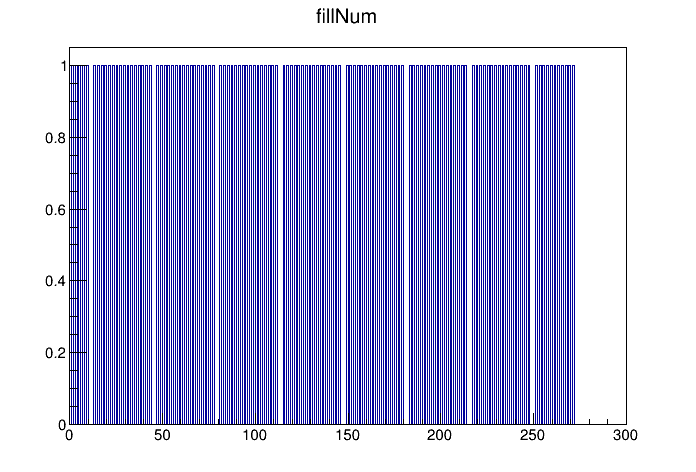

In [75]:
h = r.TH1D("h","fillNum",300,0,300)
t.Draw("eventNum>>h","","goff")
c = r.TCanvas()
h.Draw()
c.Draw()

numFills = int(h.GetEntries())
print(numFills, "fills")

total ctag: 52813.0
avg ctag/fill: 412.6015625


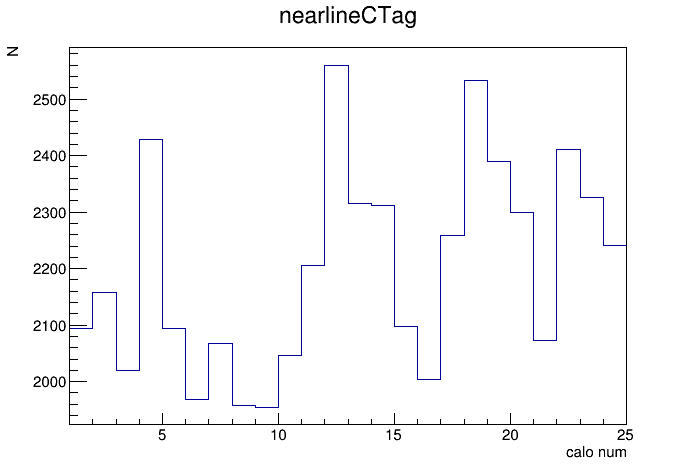

In [76]:
nearlineCTag = f.Get("nearlineHistTree").Get("nearlineCTag").Clone()
c = r.TCanvas()
nearlineCTag.Draw()
c.Draw()

totalCtag = nearlineCTag.GetEntries()
print("total ctag:", totalCtag)
print("avg ctag/fill:", totalCtag/numFills)

---

### This number is kind of crazy... Lets see whats happening here.

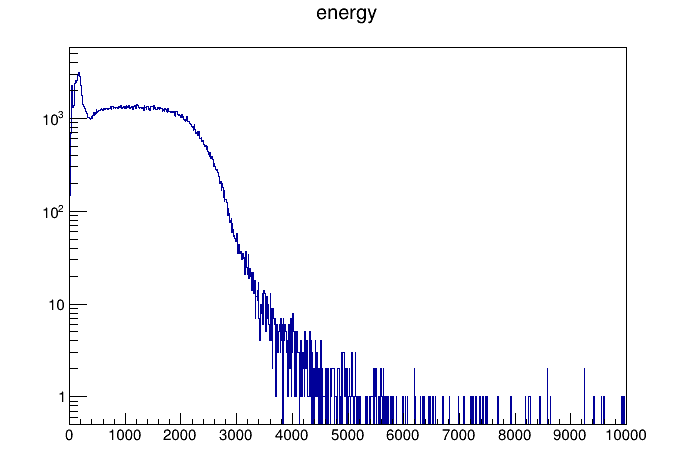

In [77]:
c = r.TCanvas()
t.Draw("energy>>hist(1000,0,10000)","","")
c.SetLogy()
c.Draw()

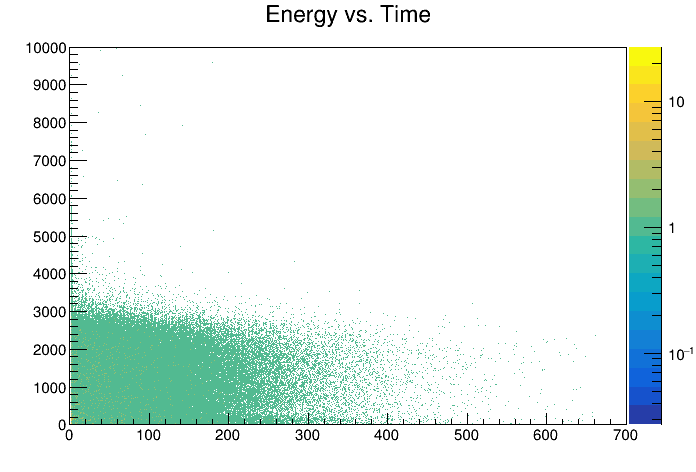

In [78]:
c = r.TCanvas()
h2 = r.TH2D("h2","Energy vs. Time",4700,0,700,10000,0,10000)
t.Draw("energy:time*1.25/1000>>h2","energy < 10000","goff")
h2.Draw("colz")
c.SetLogz()
c.Draw()

2084 clusters in this energy/time range
16.28125 clusters in this energy/time range per fill


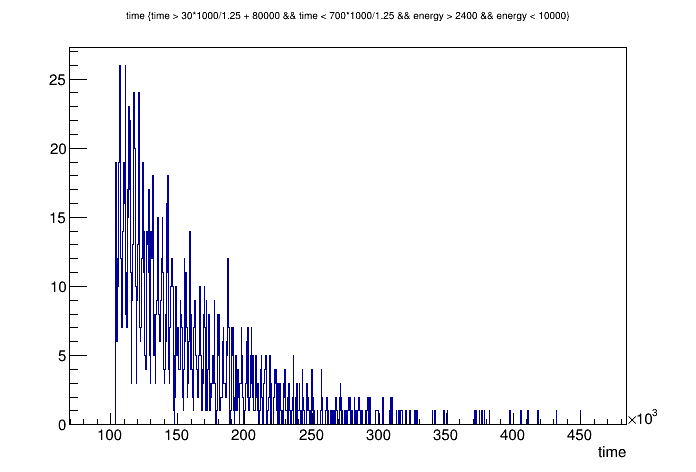

In [82]:
#2400 threshold from aaron in the dqm
#80000 ct extra to align with hannah
nHit = t.Draw("time","time > 30*1000/1.25 + 80000 && time < 700*1000/1.25 && energy > 2400 && energy < 10000")
c.Draw()
print(nHit, "clusters in this energy/time range")
print(nHit/numFills, "clusters in this energy/time range per fill")

52815 clusters in this energy/time range
412.6171875 clusters in this energy/time range per fill


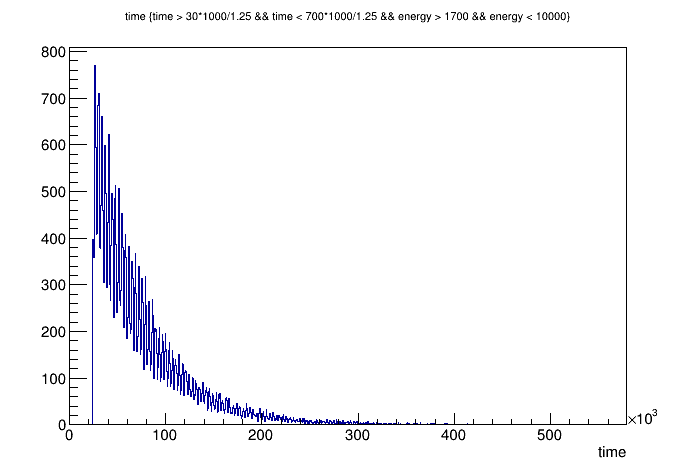

In [80]:
#2400 threshold from aaron in the dqm
nHit = t.Draw("time","time > 30*1000/1.25 && time < 700*1000/1.25 && energy > 1700 && energy < 10000")
c.Draw()
print(nHit, "clusters in this energy/time range")
print(nHit/numFills, "clusters in this energy/time range per fill")